# Project : Predict the Price of Airbnb rooms 

#### Objective: Predict the price of rooms to be advertised on the Airbnb site. The prediction is based on different attributes like neighborhood, number of rooms, number of reviews, availibility of the rooms. The dataset is obtained from historic Airbnb data obtained from Airbnb site.

## Analyze the data

### Step 1: Read CSV file with Airbnb data downloaded from http://insideairbnb.com/get-the-data.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%pylab inline
df = pd.read_csv('/Users/doyelm/Documents/Project/listings.csv')



Populating the interactive namespace from numpy and matplotlib


### Step2: Study the data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9663 entries, 0 to 9662
Data columns (total 16 columns):
id                                9663 non-null int64
name                              9663 non-null object
host_id                           9663 non-null int64
host_name                         9661 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     9663 non-null int64
latitude                          9663 non-null float64
longitude                         9663 non-null float64
room_type                         9663 non-null object
price                             9663 non-null int64
minimum_nights                    9663 non-null int64
number_of_reviews                 9663 non-null int64
last_review                       6006 non-null object
reviews_per_month                 6007 non-null float64
calculated_host_listings_count    9663 non-null int64
availability_365                  9663 non-null int64
dtypes: float64(4), 

In [3]:
df.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9.663000e+03,9.663000e+03,0.0,9663.000000,9663.000000,9663.000000,9663.000000,9663.000000,9663.000000,6007.000000,9663.000000,9663.000000
mean,9.655724e+06,2.907623e+07,NaN,78722.467764,30.276059,-97.751336,292.788471,2.419021,13.917313,1.359161,3.673704,167.370071
std,5.702724e+06,3.111086e+07,NaN,20.714283,0.054293,0.052304,443.171455,5.808939,33.274246,1.675813,9.636083,148.704061
min,1.078000e+03,2.300000e+01,NaN,78701.000000,30.114882,-98.053553,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,4.849021e+06,4.689866e+06,NaN,78704.000000,30.244039,-97.769482,89.000000,1.000000,0.000000,0.240000,1.000000,9.000000
50%,1.036768e+07,1.738394e+07,NaN,78721.000000,30.266359,-97.744387,160.000000,2.000000,2.000000,0.740000,1.000000,133.000000
75%,1.518828e+07,4.427075e+07,NaN,78745.000000,30.298177,-97.722401,340.000000,2.000000,12.000000,1.830000,2.000000,339.000000
max,1.759094e+07,1.195162e+08,NaN,78759.000000,30.506688,-97.560622,10000.000000,250.000000,427.000000,12.000000,73.000000,365.000000


In [14]:
print("mean "+str(df['price'].mean()))
print("standard dev "+str(df['price'].std()))
#print(df['price'].quantile())
print("Median "+str(df['price'].median()))
print("Mode "+str(df['price'].mode()))

mean 292.78847148918555
standard dev 443.17145541916176
Median 160.0
Mode 0    150
dtype: int64


In [16]:
pd.DataFrame(df['price'].describe())

,price
count,9663.000000
mean,292.788471
std,443.171455
min,0.000000
25%,89.000000
50%,160.000000
75%,340.000000
max,10000.000000


### Plot histogram to determine price range

Text(0.5,0,'price')

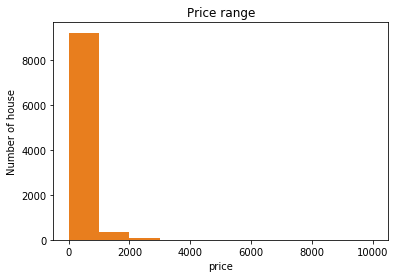

In [13]:
ax = df['price'].hist()

ax.set_title('Price range')

df['price'].plot.hist(alpha=0.9)

ax.set_ylabel('Number of house')
ax.set_xlabel('price')
#df['price'].plot.hist(alpha=0.7,bins=50)

### Plot histogram to determine price range - on a logarithmic scale

Text(0.5,1,'Price range on logarithmic scale')

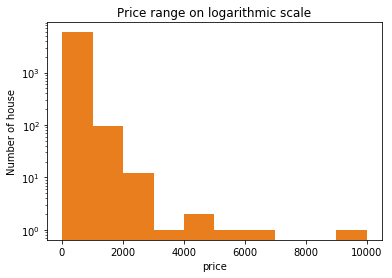

In [26]:
ax = df['price'].hist()

ax.set_title('Price range')


df['price'].plot.hist(alpha=0.9)

ax.set_ylabel('Number of house')
ax.set_yscale('log')
ax.set_xlabel('price')

plt.title('Price range on logarithmic scale')

### Plot Bar Plot to determine price variation with neighborhood

Text(0.5,0.98,'')

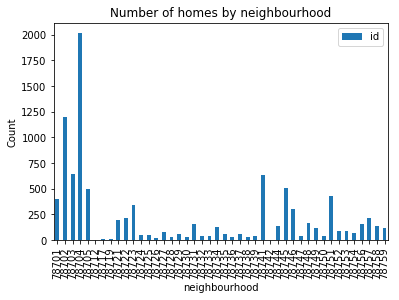

In [17]:
df.groupby(['neighbourhood' ])[['id']].count().plot(kind='bar').set_ylabel('Count')

plt.title('Number of homes by neighbourhood')
plt.suptitle("")

### Plot whisker plot to determine outliers

Find outliers for each room type
Populating the interactive namespace from numpy and matplotlib


Text(0.5,0.98,'')

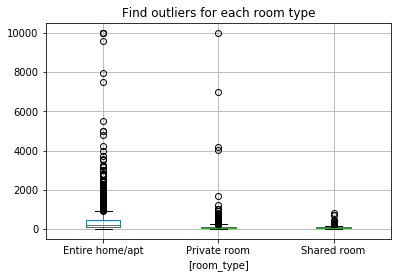

In [20]:
print('Find outliers for each room type')
import pandas as pd
%pylab inline
df = pd.read_csv('/Users/doyelm/Documents/Project/listings.csv')

df.boxplot(column=['price'], by=['room_type'])
plt.title('Find outliers for each room type')
plt.suptitle("")

### Boxplot without outliers

Remove outliers for each room type
Populating the interactive namespace from numpy and matplotlib


Text(0.5,0.98,'')

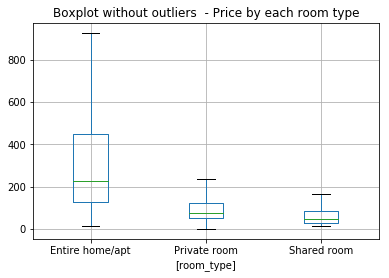

In [22]:
print('Remove outliers for each room type')
import pandas as pd
df = pd.read_csv('/Users/doyelm/Documents/Project/listings.csv')
%pylab inline


df.boxplot(column=['price'], by=['room_type'],showfliers=False)
plt.title('Boxplot without outliers  - Price by each room type')
plt.suptitle("")

### Plot count of each type of room 

Text(0.5,1,'Room Type - Count')

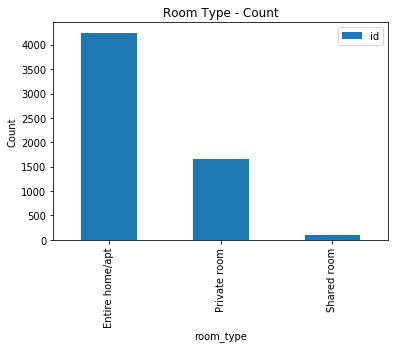

In [24]:
df.groupby(['room_type' ])[['id']].count().plot(kind='bar').set_ylabel('Count')
plt.title('Room Type - Count')

### Check number of last reviews by years to check if most of the data is current

DatetimeIndex(['2016-05-13', '2013-03-12', '2016-12-20', '2016-06-12',
               '2017-02-20', '2017-03-06', '2017-03-03', '2017-01-04',
               '2017-03-05', '2016-10-21',
               ...
               '2017-02-19', '2016-11-11', '2016-12-01', '2017-02-22',
               '2017-02-17', '2015-10-28', '2017-02-16', '2017-02-23',
               '2017-01-15', '2017-02-25'],
              dtype='datetime64[ns]', name='last_review', length=6006, freq=None)


Text(0.5,1,'Number of last reviews by year')

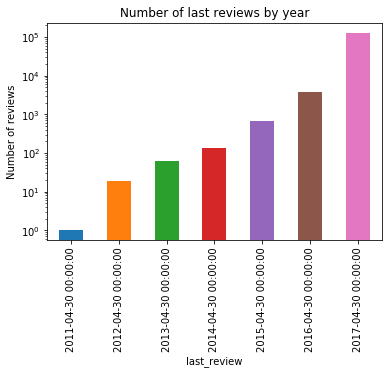

In [23]:
from datetime import datetime

df = df[df.last_review.notnull()]
dates = pd.to_datetime(df.last_review, format='%Y-%m-%d')
#print(dates)
#df = dates.groupby([pd.TimeGrouper('12M')]) 
df.set_index(dates,inplace=True)
print(df.index)
df['number_of_reviews'].resample('6M').sum().plot(kind='bar').set_ylabel('Number of reviews')
df['number_of_reviews'].resample('12M').sum().plot(kind='bar').set_ylabel('Number of reviews')
plt.yscale('log')
plt.title('Number of last reviews by year')

### Check location of the homes to check if they are from the same area

Text(0.5,1,'Number of homes by latitude longitude')

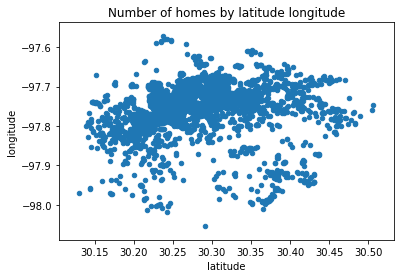

In [25]:
df.plot.scatter('latitude','longitude')
plt.title('Number of homes by latitude longitude')

## Clean the data

### Find how many neighbourgoods have sample > 10

In [32]:
df2 = df.groupby(['neighbourhood'])[['id']].count().reset_index()
 
len(df2[df2.id > 10].sort_values('id',ascending=False ) )

39

### Select top 39 neighbourhoods - from above result we see 39 neighbourhoods have sample > 10

In [5]:

df_1=df.groupby(['neighbourhood' ])[['id']].count().sort_values(by=['id'], ascending=False)[0:39]

# choose data for the neighbourhoods in the list created above
df_new = df[df['neighbourhood'].isin(df_1.index.values.tolist())].loc[:, ('neighbourhood', 'latitude','longitude','room_type','price','minimum_nights','number_of_reviews', 'availability_365') ]
df_new.fillna(0)   
df_new.price=df_new.price.astype(float) 
df_new.minimum_nights=df_new.minimum_nights.astype(float) 
df_new.number_of_reviews=df_new.number_of_reviews.astype(float) 
df_new.availability_365=df_new.availability_365.astype(float) 
df_new.neighbourhood=df_new.neighbourhood.astype(str) 
 
df_new.info()
 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9621 entries, 0 to 9662
Data columns (total 8 columns):
neighbourhood        9621 non-null object
latitude             9621 non-null float64
longitude            9621 non-null float64
room_type            9621 non-null object
price                9621 non-null float64
minimum_nights       9621 non-null float64
number_of_reviews    9621 non-null float64
availability_365     9621 non-null float64
dtypes: float64(6), object(2)
memory usage: 676.5+ KB


### Check if data exists with price == 0

In [5]:
df[df.price == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1948,5537445,Hip Complex Close to Downtown,411693,Jonathan,NaN,78741,30.23127,-97.725258,Private room,0,1,0,NaN,NaN,1,0


### convert non-numeric binary variables into binary (0/1) variables. Converts categorical variables into dummy variables.

In [11]:

def preprocess_features(X):
    '''   converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''

    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)
    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        #print(col,col_data)
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

y =  log( df_new.price+1)#.fillna(0)   

X = df_new.loc[:,df_new.columns != 'price'] 
X_all = preprocess_features(X)
 
 

 